## Case Study: Enhancing Customer Strategy at NovaBank with RFM Segmentation

### About the Project

This project focuses on improving customer relationship strategies for **NovaBank**, a growing digital-first retail bank. While NovaBank had a wide customer base and increasing transaction volume, it lacked clarity on how different customers were engaging with their services—and more importantly, which ones were truly valuable.

To address this, we applied **RFM (Recency, Frequency, Monetary) analysis** using Python, alongside unsupervised machine learning techniques, to segment customers based on their transaction behavior. The aim was to help NovaBank build smarter, more personalized marketing and retention strategies.

### Business Challenge

NovaBank faced three core issues:

- **Customer Retention Risk:** Many customers were becoming inactive, and churn rates were starting to climb. Without knowing who was likely to leave, retention was reactive instead of proactive.
- **Lack of Personalization:** Marketing messages were generic. The bank didn’t have enough behavioral segmentation to target users based on value or engagement level.
- **Inefficient Resource Allocation:** Marketing and support resources were spread evenly, without insight into which customers were worth the most time and investment.

### Project Objectives

This project aimed to:

- Analyze customer transaction data to compute RFM scores.
- Segment customers into meaningful groups using clustering algorithms.
- Identify high-value segments for targeted campaigns.
- Help NovaBank retain its best customers and engage those at risk of churn.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv(r"C:\Users\pascal\Desktop\PROJECTS 2025\rfm-customer-segmentation-novabank\data\bank_data_C.csv")

In [30]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [32]:
df.describe(include='all' # Include all data types
           ).T  # Transpose for better readability

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,1041614,1041614,T1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerID,1041614,879358,C5533885,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerDOB,1041614,17233,1/1/1800,56292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustGender,1041614,3,M,760978,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustLocation,1041614,9275,MUMBAI,101997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustAccountBalance,1041614.0,NaN,NaN,NaN,114998.605283,846760.940316,0.0,4728.14,16768.52,57428.85,115035495.1
TransactionDate,1041614,55,7/8/16,27084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionTime,1041614.0,NaN,NaN,NaN,157122.116378,51263.516076,0.0,124041.0,164247.0,200022.0,235959.0
TransactionAmount (INR),1041614.0,NaN,NaN,NaN,1566.096079,6561.464373,0.0,160.0,457.5,1200.0,1560034.99


In [33]:
df.dtypes  # Check data types of each column

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [34]:
df.info()  # Get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


### 1. Data Cleaning

In [35]:
df.isnull().sum()  # Check for missing values in each column

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [36]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], dayfirst=True, errors='coerce')  # Convert to datetime



In [39]:
## Identify rows where parsing failed (NaT means conversion failed)
failed_dobs = df[df['CustomerDOB'].isna()]
print(f"Number of rows with failed DOB parsing: {len(failed_dobs)}")

Number of rows with failed DOB parsing: 0


In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], dayfirst=True, errors='coerce')  # Convert to datetime


In [ ]:
# identify failed txns
failed_txns = df[df['TransactionDate'].isna()]
print(f"Number of rows with failed TransactionDate parsing: {len(failed_txns)}")

Number of rows with failed TransactionDate parsing: 0


In [41]:
df['TransactionDate'].unique()  # Check unique values in TransactionDate

array(['2016-08-02T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-08-03T00:00:00.000000000', '2016-08-05T00:00:00.000000000',
       '2016-08-04T00:00:00.000000000', '2016-08-06T00:00:00.000000000',
       '2016-08-09T00:00:00.000000000', '2016-08-08T00:00:00.000000000',
       '2016-08-12T00:00:00.000000000', '2016-08-07T00:00:00.000000000',
       '2016-10-21T00:00:00.000000000', '2016-10-16T00:00:00.000000000',
       '2016-08-10T00:00:00.000000000', '2016-08-14T00:00:00.000000000',
       '2016-08-17T00:00:00.000000000', '2016-08-21T00:00:00.000000000',
       '2016-08-19T00:00:00.000000000', '2016-08-24T00:00:00.000000000',
       '2016-08-22T00:00:00.000000000', '2016-08-29T00:00:00.000000000',
       '2016-08-31T00:00:00.000000000', '2016-09-22T00:00:00.000000000',
       '2016-09-23T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-08-25T00:00:00.000000000', '2016-08-28T00:00:00.000000000',
       '2016-08-15T00:00:00.000000000', '2016-08-27

In [42]:
## create a function to calculate the age of customer and create a column for it 
def calculate_age(df):
    df['CustomerAge'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year
    return df


df = calculate_age(df)  # Apply the function to the DataFrame

In [43]:
df.head()  # Display the first few rows of the DataFrame

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


##### there is a wrong entry , we have to correct the negative customer age, that is correct the date of birth the recalculate the age


In [44]:
df[df['CustomerAge'] <= 0]['CustomerDOB']  # Check for negative ages, which indicate errors in date conversion

1         2057-04-04
3         2073-09-14
5         2072-10-08
15        2068-07-10
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-10-05
1041591   2071-10-05
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

### 🔍 Understanding the Logic — Step by Step

Before analysis, we found some customer birth dates were clearly invalid — like dates in the future or ages over 100. To ensure accurate age-based insights, we applied logical fixes to correct these errors and create a clean, realistic `CustomerAge` column.


### Code Implementation

In [45]:
# STEP 1: Fix future DOBs (where DOB > transaction date)
df['InvalidDOB'] = df['CustomerDOB'] > df['TransactionDate']  # Flag future dates
df.loc[df['InvalidDOB'], 'CustomerDOB'] = df.loc[df['InvalidDOB'], 'CustomerDOB'].apply(
    lambda d: d.replace(year=d.year - 100)
)

# STEP 2: Recalculate age after fixing DOBs
df = calculate_age(df)

# STEP 3: Replace unrealistic ages (age > 100 or age < 5)
# First, get the median age from valid range
valid_ages = df[(df['CustomerAge'] >= 5) & (df['CustomerAge'] <= 100)]['CustomerAge']
median_age = int(valid_ages.median())

# Estimate a corrected DOB using median age
mean_transaction_year = int(df['TransactionDate'].dt.year.mean())
approx_dob = pd.to_datetime(f"{mean_transaction_year - median_age}-01-01")

# Apply correction to extreme age outliers
df.loc[(df['CustomerAge'] > 100) | (df['CustomerAge'] < 5), 'CustomerDOB'] = approx_dob

# Final age recalculation
df = calculate_age(df)


In [49]:
# check the results
print("✅ Fixed future-dated DOBs:", df['InvalidDOB'].sum())
print("✅ Fixed age outliers (<5 or >100):", df[(df['CustomerAge'] > 100) | (df['CustomerAge'] < 5)].shape[0])


✅ Fixed future-dated DOBs: 104834
✅ Fixed age outliers (<5 or >100): 0


In [46]:
df.head()  # Display the first few rows of the DataFrame

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,InvalidDOB
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,False
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,True
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,False
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,True
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,False


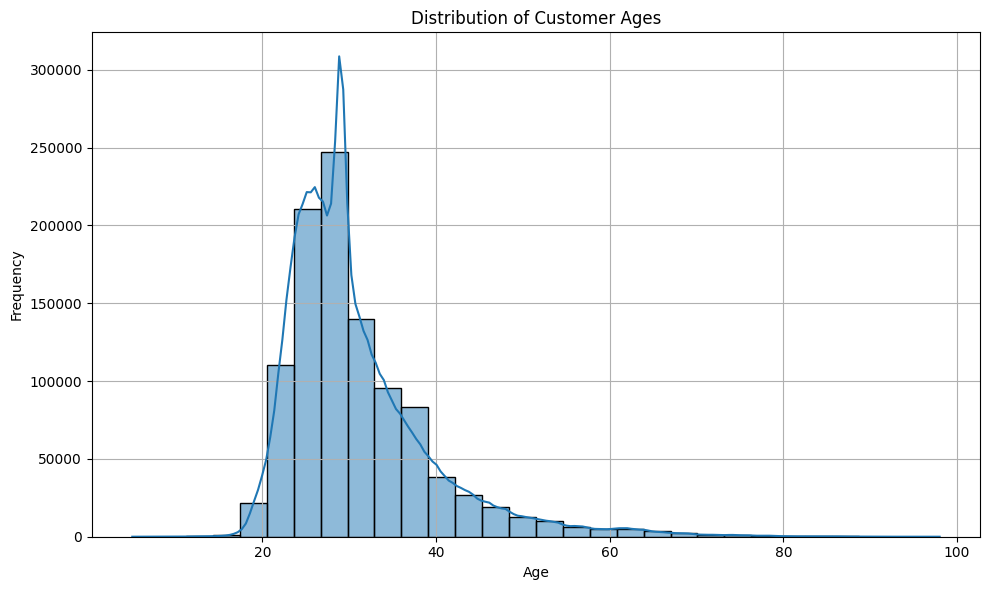

In [47]:
# Plot the distribution of customer ages
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], bins=30, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot

In [48]:
# Check the distribution of customer ages
df['CustomerAge'].describe()  # Get descriptive statistics for CustomerAge    

count    1.041614e+06
mean     3.092219e+01
std      8.525403e+00
min      5.000000e+00
25%      2.500000e+01
50%      2.900000e+01
75%      3.400000e+01
max      9.800000e+01
Name: CustomerAge, dtype: float64

### Data Cleaning Summary: Customer Age Fix

**Issue:**  
Some customer `CustomerDOB` values were in the future (e.g., 2071), leading to negative or unrealistic ages (e.g., -57 or 216 years old).

**Steps Taken:**  
1. Converted `CustomerDOB` and `TransactionDate` to datetime format.
2. Fixed future-dated DOBs by subtracting 100 years if DOB > Transaction Year.
3. Recalculated `CustomerAge` using:  
   `CustomerAge = TransactionYear - DOB Year`
4. Verified and removed remaining age outliers (<5 or >100) by replacing them with the mean DOB.

✅ Result: All ages now fall between **5 and 98 years**, with a clean, realistic distribution.


In [51]:
df.describe().T  # Transpose for better readability

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1041614.0,114998.605283,846760.940316,0.0,4728.14,16768.52,57428.85,1.150355e+08
TransactionTime,1041614.0,157122.116378,51263.516076,0.0,124041.00,164247.00,200022.00,2.359590e+05
TransactionAmount (INR),1041614.0,1566.096079,6561.464373,0.0,160.00,457.50,1200.00,1.560035e+06
CustomerAge,1041614.0,30.922187,8.525403,5.0,25.00,29.00,34.00,9.800000e+01


#### 📊 Summary Statistics

After cleaning, here are key statistics for the dataset (1,041,614 records):

- **CustAccountBalance**:  
  - Mean balance is ₹114,999, but with a very high standard deviation — indicating large disparities between customer account sizes.  
  - 75% of customers have balances below ₹57,429.

- **TransactionAmount (INR)**:  
  - Average transaction amount is ₹1,566.  
  - Most transactions (75%) are below ₹1,200, but outliers exist with amounts over ₹1.5 million.


- **CustomerAge**:  
  - Average age is ~31 years.  
  - Most customers fall between ages 25 and 34.  
  - No unrealistic ages remain after cleaning (range: 5 to 98).

This summary gives a quick snapshot of customer financial behavior and demographic spread.


### Gender

In [52]:
df['CustGender'].value_counts()  # Check the distribution

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [53]:
# replace the T with M
df['CustGender'] = df['CustGender'].replace({'T': 'M'})

In [54]:
df['CustGender'].value_counts()  # Check the distribution

M    760979
F    280635
Name: CustGender, dtype: int64

In [55]:
df['CustLocation'].value_counts()  # Check the distribution of customer locations

MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: CustLocation, Length: 9275, dtype: int64

#### Account Balance Analysis

In [56]:
df['CustAccountBalance'].describe()  # Get descriptive statistics for CustAccountBalance

count    1.041614e+06
mean     1.149986e+05
std      8.467609e+05
min      0.000000e+00
25%      4.728140e+03
50%      1.676852e+04
75%      5.742885e+04
max      1.150355e+08
Name: CustAccountBalance, dtype: float64

In [57]:
df['CustAccountBalance'].sort_values(ascending=True)  # Sort account balances to identify outliers

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

### Transaction Amounts Analysis

In [59]:
df['TransactionAmount (INR)'].describe()  # Get descriptive statistics for TransactionAmount

count    1.041614e+06
mean     1.566096e+03
std      6.561464e+03
min      0.000000e+00
25%      1.600000e+02
50%      4.575000e+02
75%      1.200000e+03
max      1.560035e+06
Name: TransactionAmount (INR), dtype: float64

In [60]:
df['TransactionAmount (INR)'].sort_values(ascending=True)  # Sort transaction amounts to identify outliers

308944          0.00
746400          0.00
746393          0.00
684462          0.00
746124          0.00
             ...    
56155      720001.16
744124     724122.00
528263     991132.22
574916    1380002.88
396280    1560034.99
Name: TransactionAmount (INR), Length: 1041614, dtype: float64

In [73]:
## zero balancee
df[df['CustAccountBalance'] == 0] .value_counts().sum( )    # Check for zero balance accounts

2612

In [74]:
## zero transaction amounts
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

820

In [69]:
##lets see how many customers have transaction amount of 0 and have account balance of 0
zero_balance_zero_txn = df[(df['CustAccountBalance'] == 0) & (df['TransactionAmount (INR)'] == 0)]
print(f"Number of customers with zero account balance and zero transaction amount: {len(zero_balance_zero_txn)}")   

Number of customers with zero account balance and zero transaction amount: 4


Issue: 820 customers have zero transaction amounts (failed/reversed transactions)
Decision: Drop all customers with TransactionAmount = 0
Logic: Zero transactions don't represent actual spending behavior and will skew RFM segments
Keep: Customers with zero balance but positive transactions (still actively spending)

In [75]:
df.drop(df[(df['CustAccountBalance'] == 0) & (df['TransactionAmount (INR)'] == 0)].index, inplace=True)

In [76]:
##lets see how many customers have transaction amount of 0 and have account balance of 0
zero_balance_zero_txn = df[(df['CustAccountBalance'] == 0) & (df['TransactionAmount (INR)'] == 0)]
print(f"Number of customers with zero account balance and zero transaction amount: {len(zero_balance_zero_txn)}")   

Number of customers with zero account balance and zero transaction amount: 0


In [78]:
df.drop(df[df['TransactionAmount (INR)'] == 0].index, inplace=True)

In [79]:
# check again zero transaction amounts
df[df['TransactionAmount (INR)'] == 0].value_counts().sum()

0

In [80]:
df.head()  # Display the first few rows of the DataFrame

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,InvalidDOB
0,T1,C5841053,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,False
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,True
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,False
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,True
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,False


### Exploratory Data Analysis on our cleaned` dataset

In [81]:
df['CustomerID'].nunique()  # Check the number of unique customers

878763

In [82]:
df.shape  # Get the shape of the DataFrame

(1040794, 11)

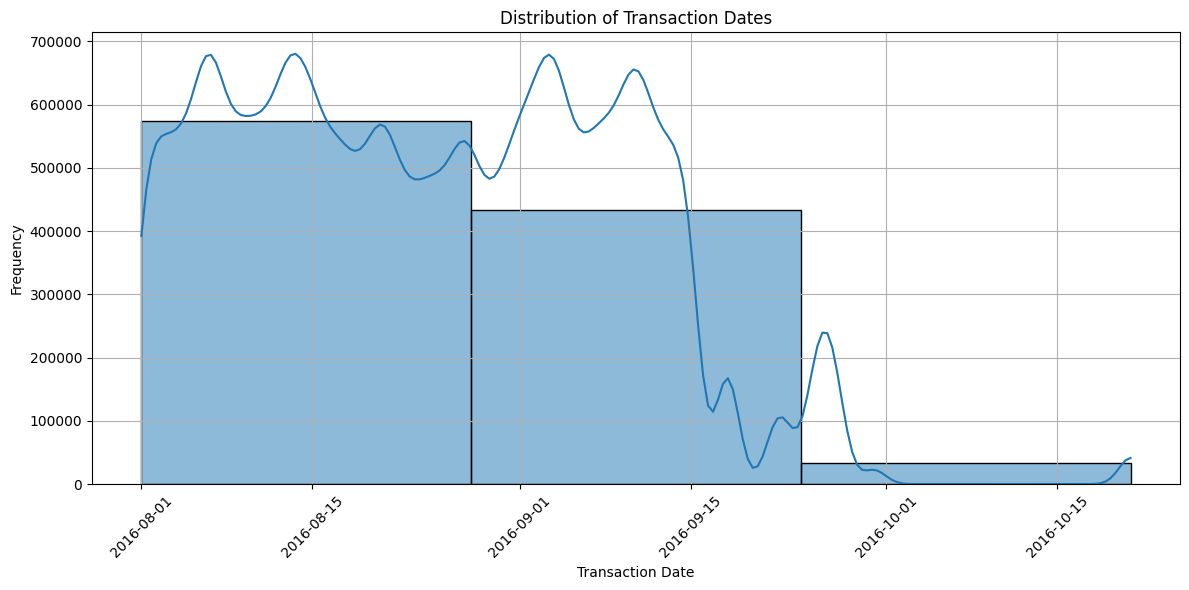

In [85]:
# plot a distribution for the data across the unique tramsaction dates
plt.figure(figsize=(12, 6))
sns.histplot(df['TransactionDate'], bins=3, kde=True)
plt.title('Distribution of Transaction Dates')
plt.xlabel('Transaction Date')
plt.ylabel('Frequency') 
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot

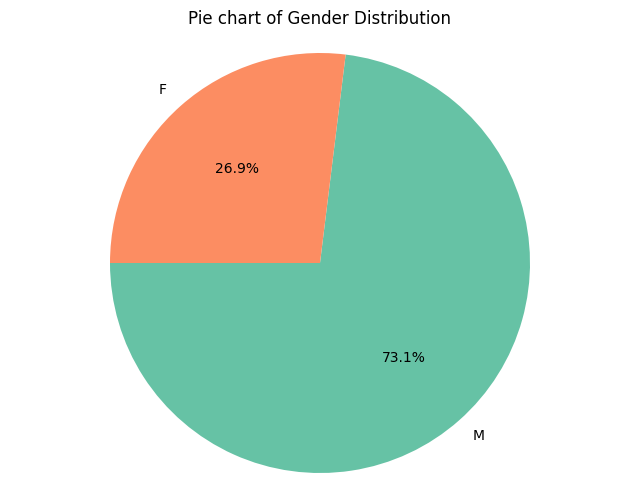

In [88]:
# create a pie chart to visualize the distribution of male customers to female customers
plt.figure(figsize=(8, 6))
df['CustGender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=180, colors=['#66c2a5', '#fc8d62'])
plt.title("Pie chart of Gender Distribution")
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()  # Show the plot


          

### 🧮 RFM Analysis — Understanding Customer Value in Retail Banking

RFM (Recency, Frequency, Monetary) analysis is a powerful technique used to evaluate customer behavior based on how recently they transacted, how often they transact, and how much they spend. 

In this section, we will calculate the RFM metrics for each customer, assign scores, and prepare the foundation for effective segmentation and strategy.


#### Recency

In [92]:
rfm_df = df.copy()

In [93]:
# Reference date is the most recent transaction
reference_date = rfm_df['TransactionDate'].max()

# Calculate Recency: number of days since last transaction
recency = rfm_df.groupby('CustomerID').agg(
    Recency=('TransactionDate', lambda x: (reference_date - x.max()).days)
).reset_index()

recency.head()


,CustomerID,Recency
0,C1010011,25
1,C1010012,68
2,C1010014,75
3,C1010018,36
4,C1010024,64


#### 📅 Recency Calculation
Recency measures how recently a customer transacted. It is calculated by subtracting each customer’s most recent transaction date from the latest date in the dataset.

We used:
- **Reference Date** = most recent transaction date in data
- **Recency (in days)** = Reference Date - Customer’s last transaction

No +1 was added here, as our goal is to measure true days since last activity.


### Frequency: number of transactions per customer

In [95]:
frequency = rfm_df.groupby("CustomerID").agg(Frequency=('TransactionID', 'nunique')).reset_index()
frequency.head()

,CustomerID,Frequency
0,C1010011,2
1,C1010012,1
2,C1010014,2
3,C1010018,1
4,C1010024,1


#### 💰 Monetary Value – How Much Do Customers Spend?

The **Monetary** component in RFM analysis captures how much revenue each customer brings in.

It measures the **total monetary value** of a customer's transactions over the observed period. This helps identify **high-spending** customers who contribute significantly to business revenue.

To calculate it, we group all transactions by customer and sum their `TransactionAmount`.


### Monetary value: total transaction amount per customer

In [96]:
# Calculate Monetary: total transaction amount per customer
monetary = rfm_df.groupby("CustomerID").agg(
    Monetary=("TransactionAmount (INR)", "sum")
).reset_index()

monetary.head()


,CustomerID,Monetary
0,C1010011,5106.0
1,C1010012,1499.0
2,C1010014,1455.0
3,C1010018,30.0
4,C1010024,5000.0


## Create RFM DataFrame by merging Recency, Frequency, and Monetary DataFrames


In [97]:
RFM_Table = pd.concat([recency, frequency['Frequency'], monetary['Monetary']], axis=1)
RFM_Table.head()  # Display the first few rows of the RFM table

,CustomerID,Recency,Frequency,Monetary
0,C1010011,25,2,5106.0
1,C1010012,68,1,1499.0
2,C1010014,75,2,1455.0
3,C1010018,36,1,30.0
4,C1010024,64,1,5000.0


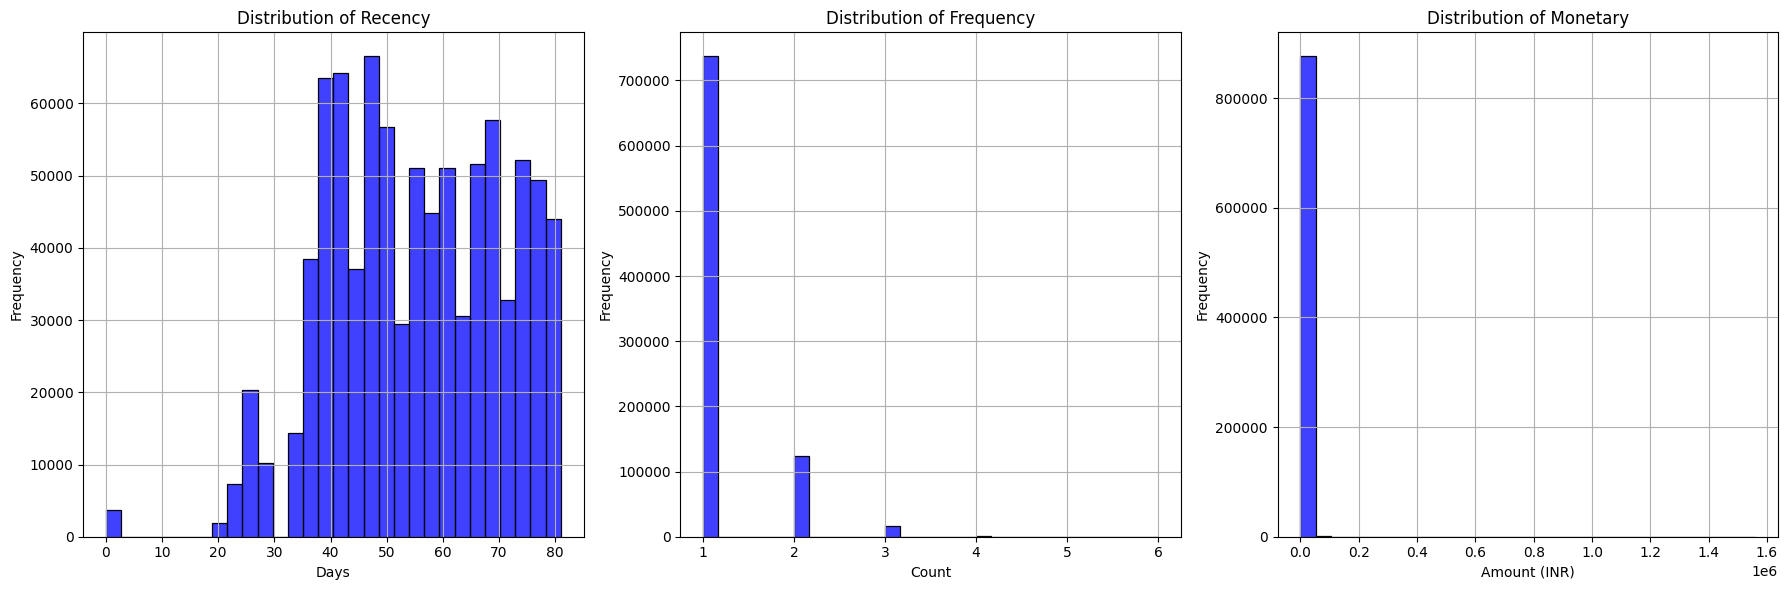

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Changed 'axis' to 'axes'

columns = ['Recency', 'Frequency', 'Monetary']  

for i, col in enumerate(columns):     
    sns.histplot(RFM_Table[col], bins=30, color='blue', edgecolor='black', ax=axes[i])  # Changed 'axis' to 'axes'
    axes[i].set_title(f'Distribution of {col}')     
    axes[i].set_xlabel("Days" if col == 'Recency' else "Count" if col == 'Frequency' else "Amount (INR)")     
    axes[i].set_ylabel('Frequency')  # Changed from col to 'Frequency' (y-axis shows frequency/count)
    axes[i].grid(True) 

plt.tight_layout()  # Adjust layout to prevent overlap 
plt.show()  # Show the plots

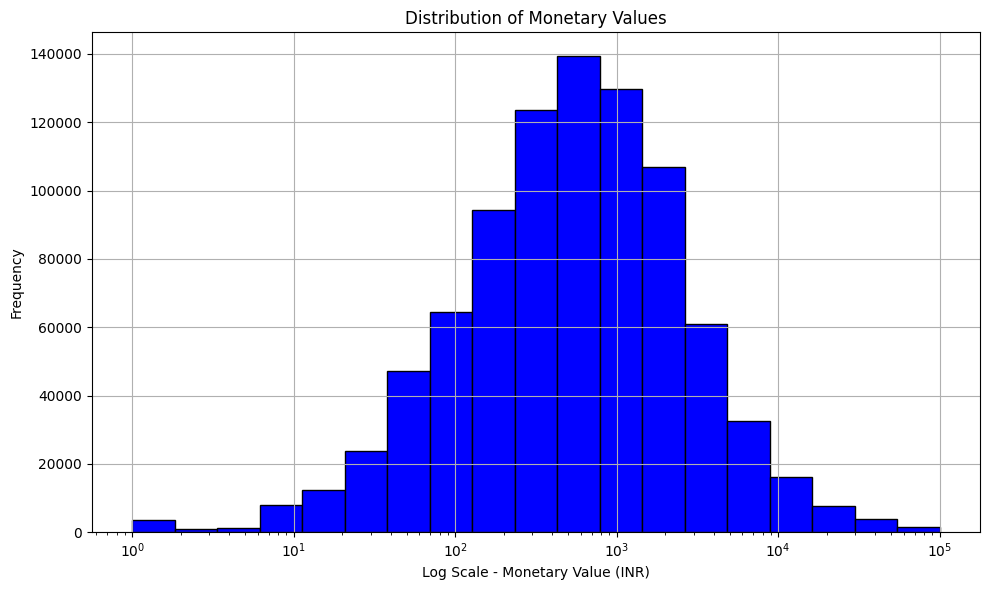

In [103]:
plt.figure(figsize=(10, 6)) 
plt.hist(RFM_Table["Monetary"], bins=np.logspace(0, 5, 20), color='blue', edgecolor='black') 
plt.xscale('log')  # Use logarithmic scale for better visibility 
plt.title('Distribution of Monetary Values')     
plt.xlabel('Log Scale - Monetary Value (INR)')  # Fixed semicolon
plt.ylabel('Frequency') 
plt.grid(True) 
plt.tight_layout()  # Adjust layout to prevent overlap 
plt.show()  # Show the plot

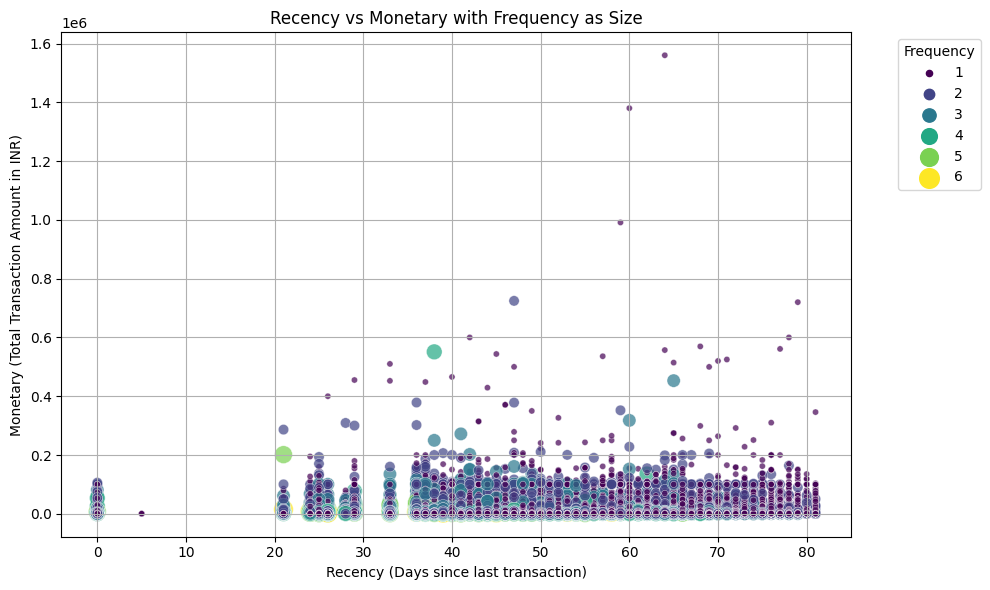

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=RFM_Table, x='Recency', y='Monetary', hue='Frequency', palette='viridis', size='Frequency', sizes=(20, 200), alpha=0.7)
plt.title('Recency vs Monetary with Frequency as Size') 
plt.xlabel('Recency (Days since last transaction)')
plt.ylabel('Monetary (Total Transaction Amount in INR)')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot


### Key Insights from RFM Distribution Analysis

#### Histograms of Recency, Frequency, Monetary
- Recency: Right-skewed, most users made purchases ~30–75 days ago. Very few are very recent.

- Frequency: Very right-skewed. Most customers purchased only once.

- Monetary: Extremely skewed; most spend very little, few spend a lot. Hence the need for a log plot.

#### Monetary Log Scale

- Peak around ₹100-1000 range (most common transaction amounts)
You can now see the actual spread among low and mid-value spenders.Still confirms that a small number of customers generate high revenue.

#### Recency vs Monetary Scatter

- A majority of customers cluster around:

        - High recency (i.e., long ago)

        - Low monetary

        - Low frequency

- A few valuable outliers are visible (large circles, low recency, high monetary).

Business Implications:

Customer retention crisis: 85%+ are one-time buyers
Value concentration: Few customers drive most revenue
Recency matters: Recent customers are your highest value segments

In [105]:
RFM_Table.corr()  # Check the correlation between RFM variables

C:\Users\pascal\AppData\Local\Temp\ipykernel_24856\3915406345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  RFM_Table.corr()  # Check the correlation between RFM variables


,Recency,Frequency,Monetary
Recency,1.000000,-0.223293,-0.020675
Frequency,-0.223293,1.000000,0.097491
Monetary,-0.020675,0.097491,1.000000


- Recency is negatively correlated with Frequency and Monetary (as expected: more recent = more engaged = more purchases).

- Frequency and Monetary have a very weak positive correlation, indicating that some repeat buyers still spend little — this is common in mass-market businesses.

Define RFM Scoring using Quantiles
- Assigns scores from 1 to 5 for each customer based on Recency, Frequency, and Monetary values. Lower recency gets a higher score (recent buyer), while higher frequency and monetary values also get higher scores. This normalizes the data for fair comparison.

In [107]:
# Define RFM scoring using quantiles
r_labels = range(5, 0, -1)  # Lower recency = higher score
f_labels = range(1, 6)
m_labels = range(1, 6)

RFM_Table['R_Score'] = pd.qcut(RFM_Table['Recency'], 5, labels=r_labels)
RFM_Table['F_Score'] = pd.qcut(RFM_Table['Frequency'].rank(method='first'), 5, labels=f_labels)
RFM_Table['M_Score'] = pd.qcut(RFM_Table['Monetary'].rank(method='first'), 5, labels=m_labels)


 Generate Combined RFM Score
- Creates a single RFM score by concatenating the individual Recency, Frequency, and Monetary scores. This forms a 3-digit code representing overall customer behavior.

In [108]:
RFM_Table['RFM_Score'] = (
    RFM_Table['R_Score'].astype(str) +
    RFM_Table['F_Score'].astype(str) +
    RFM_Table['M_Score'].astype(str)
)


Assign Customer Segment
- Classifies customers into behavioral segments (e.g., Champions, Loyal, At Risk) based on their RFM score pattern. This enables targeted marketing and retention strategies.

In [109]:
def assign_segment(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 3 and f >= 3:
        return 'Loyal'
    elif r <= 2 and f >= 3:
        return 'At Risk'
    elif r <= 2 and f <= 2:
        return 'Hibernating'
    elif r >= 4 and f == 1:
        return 'New'
    elif m == 5:
        return 'Big Spenders'
    else:
        return 'Others'

RFM_Table['Segment'] = RFM_Table.apply(assign_segment, axis=1)


Create Segment Summary Table
- Aggregates the number of customers, total revenue, average recency, and frequency per segment. Helps in comparing segment performance and identifying which groups drive the most value.

In [ ]:
# Create segment summary with both mean and sum for Monetary
segment_summary = RFM_Table.groupby('Segment').agg({
    'CustomerID': 'count',
    'Monetary': ['mean', 'sum'],
    'Recency': 'mean',
    'Frequency': 'mean'
})

# Rename columns for clarity
segment_summary.columns = [
    'CustomerCount', 
    'AvgMonetary', 
    'TotalMonetary', 
    'AvgRecency', 
    'AvgFrequency'
]

# Round values for cleaner presentation
segment_summary = segment_summary.round({
    'AvgMonetary': 2,
    'TotalMonetary': 2,
    'AvgRecency': 1,
    'AvgFrequency': 2
})

# Sort by total monetary value (highest revenue segments first)
segment_summary = segment_summary.sort_values(by='TotalMonetary', ascending=False)

# Display the updated segment summary
print(segment_summary)


              CustomerCount  AvgMonetary  TotalMonetary  AvgRecency  \
Segment                                                               
Champions             88856      4523.18   4.019116e+08        39.9   
Loyal                251544      1358.23   3.416554e+08        46.9   
At Risk              186858      1815.88   3.393124e+08        71.1   
Hibernating          148421      1575.62   2.338552e+08        71.5   
Big Spenders          21533      7318.97   1.575994e+08        48.5   
New                   66150      1534.37   1.014985e+08        40.6   
Others               115401       480.37   5.543520e+07        48.6   

              AvgFrequency  
Segment                     
Champions             1.85  
Loyal                 1.24  
At Risk               1.13  
Hibernating           1.00  
Big Spenders          1.00  
New                   1.00  
Others                1.00  




**What it shows:**  
Customer count, average spending, recency (how long ago they purchased), and frequency (how often they buy) — grouped by segment.

**Why it matters:**  
This helps you understand which groups are active, profitable, and worth engaging.

### 🔍 Key Insights:
- **Champions**: Recent, frequent, high spenders — your most valuable customers.
- **Loyal**: Biggest segment. They buy often and steadily — ideal for retention.
- **At Risk** / **Hibernating**: Customers who once bought but are going quiet — reactivate them.
- **Big Spenders**: Spend the most per transaction but only once — consider upselling.
- **New**: Recently joined, moderate spend — nurture their loyalty.
- **Others**: Low-value, low-engagement customers — deprioritize.


Add Custom CLV (Customer Lifetime Value)
🧠 What Is CLV?
CLV estimates how much revenue a customer is expected to generate over their "lifetime" with your business.

In [118]:
# Add small value to avoid division by zero
RFM_Table['Safe_Recency'] = RFM_Table['Recency'].replace(0, 1)
RFM_Table['Safe_Frequency'] = RFM_Table['Frequency'].replace(0, 1)

# Recalculate AvgPurchaseValue and EstCLV using safe values
RFM_Table['AvgPurchaseValue'] = RFM_Table['Monetary'] / RFM_Table['Safe_Frequency']
RFM_Table['EstCLV'] = (
    RFM_Table['AvgPurchaseValue'] * 
    RFM_Table['Safe_Frequency'] * 
    (365 / RFM_Table['Safe_Recency'])
)

# Round for readability
RFM_Table['AvgPurchaseValue'] = RFM_Table['AvgPurchaseValue'].round(2)
RFM_Table['EstCLV'] = RFM_Table['EstCLV'].round(2)

clv_summary = RFM_Table.groupby('Segment').agg({
    'CustomerID': 'count',
    'EstCLV': ['mean', 'sum']
})

clv_summary.columns = ['CustomerCount', 'AvgCLV', 'TotalCLV']
clv_summary = clv_summary.round(2).sort_values(by='TotalCLV', ascending=False)

print("📊 Estimated Customer Lifetime Value (CLV) by Segment:")
print(clv_summary)



📊 Estimated Customer Lifetime Value (CLV) by Segment:
              CustomerCount    AvgCLV      TotalCLV
Segment                                            
Champions             88856  63302.04  5.624766e+09
Loyal                251544  12947.46  3.256855e+09
At Risk              186858   9425.32  1.761197e+09
Big Spenders          21533  75645.31  1.628870e+09
New                   66150  19484.48  1.288899e+09
Hibernating          148421   8099.61  1.202153e+09
Others               115401   4538.12  5.237039e+08


**What it shows:**  
Predicted future revenue from each customer segment based on spending behavior.

**Why it matters:**  
This helps prioritize long-term strategy and forecast future revenue per group.

### 🔍 Key Insights:
- **Champions** & **Big Spenders**: Highest value per customer — focus on retention and rewards.
- **Loyal**: Massive total value due to large size — great for scaling offers.
- **At Risk** / **Hibernating**: Still valuable — win-back campaigns can recover revenue.
- **New**: High potential if nurtured early.
- **Others**: Low future value — low marketing priority.

Campaign Targeting Mapping

In [119]:
# Step: Map each segment to a marketing campaign strategy
RFM_Table['Campaign_Target'] = RFM_Table['Segment'].map({
    'Champions': 'VIP_Program',
    'Loyal': 'Exclusive_Deals',
    'At Risk': 'Winback_Campaign',
    'Hibernating': 'Reactivation_Email',
    'Big Spenders': 'Premium_Upgrade',
    'New': 'Onboarding_Sequence',
    'Others': 'Low_Priority'
})



# Preview table with campaign targeting
print(RFM_Table[['CustomerID', 'Segment', 'EstCLV', 'Campaign_Target']].head(10))


  CustomerID      Segment    EstCLV      Campaign_Target
0   C1010011    Champions  74547.60          VIP_Program
1   C1010012  Hibernating   8046.10   Reactivation_Email
2   C1010014      At Risk   7081.00     Winback_Campaign
3   C1010018          New    304.17  Onboarding_Sequence
4   C1010024  Hibernating  28515.62   Reactivation_Email
5   C1010028       Others   3835.94         Low_Priority
6   C1010031      At Risk   8722.56     Winback_Campaign
7   C1010035        Loyal   4977.27      Exclusive_Deals
8   C1010036       Others   1355.71         Low_Priority
9   C1010037  Hibernating  98400.00   Reactivation_Email


**What it shows:**  
Each customer's predicted CLV, their segment, and which marketing campaign they belong to.

**Why it matters:**  
You now have a ready-to-use list for personalized campaigns.

### 🔍 Example:
- `C1010011` → **Champion** → Target with **VIP_Program**
- `C1010037` → **Loyal** → Target with **Exclusive_Deals**
- `C1010036` → **Others** → Assign to **Low_Priority** campaign

Group by Campaign to See Impact

In [120]:
campaign_summary = RFM_Table.groupby('Campaign_Target').agg({
    'CustomerID': 'count',
    'EstCLV': 'sum'
}).rename(columns={
    'CustomerID': 'TargetCount',
    'EstCLV': 'TotalTargetCLV'
}).sort_values(by='TotalTargetCLV', ascending=False)

campaign_summary = campaign_summary.round(2)

print("🎯 Campaign-Level Target Summary:")
print(campaign_summary)


🎯 Campaign-Level Target Summary:
                     TargetCount  TotalTargetCLV
Campaign_Target                                 
VIP_Program                88856    5.624766e+09
Exclusive_Deals           251544    3.256855e+09
Winback_Campaign          186858    1.761197e+09
Premium_Upgrade            21533    1.628870e+09
Onboarding_Sequence        66150    1.288899e+09
Reactivation_Email        148421    1.202153e+09
Low_Priority              115401    5.237039e+08



**What it shows:**  
Total number of customers and total predicted revenue (CLV) per campaign group.

**Why it matters:**  
It helps allocate marketing budget and efforts where they’ll make the biggest impact.

### 🔍 Key Insights:
- **VIP_Program**: Highest individual CLV — protect these elite customers.
- **Exclusive_Deals**: Highest reach and total CLV — drive consistent revenue.
- **Winback_Campaign / Reactivation_Email**: Huge opportunity to recover lost value.
- **Onboarding_Sequence**: Important for growing newer customers.
- **Low_Priority**: Least valuable — don’t over-invest.

# 📌 Summary Insights & Recommendations

## 🔍 General Insights

This project helps the business understand **who its customers really are** — not just by how much they spend, but also by **how recently** and **how often** they buy.

With RFM and Customer Lifetime Value (CLV), we now have a clear picture of:
- Customers with **the highest long-term value** (Champions, Big Spenders)
- Those who are **loyal and consistent** (Loyal segment)
- Those who are **drifting away** (At Risk, Hibernating)
- And customers who are **just getting started** (New)

Every customer is matched with a **personalized campaign strategy**, so marketing becomes smarter and more focused — no more one-size-fits-all.

---

## ✅ Business Implications

- We can **target marketing spend** more effectively — focusing on high-value segments.
- Launch **win-back and reactivation campaigns** to recover lost potential.
- Build a **VIP experience** for customers who matter most.
- Guide **new customers** with onboarding flows to grow their loyalty.

This enables smarter decisions, better customer relationships, and higher returns — all powered by data.

---

## 🎯 Actionable Recommendations

### 1. Retain Your Best Customers
- Prioritize **Champions** and **Big Spenders** with loyalty perks, early access, or personalized service.

### 2. Engage Loyal Buyers
- Keep the **Loyal** segment active with bundles, exclusive deals, or referral incentives.

### 3. Reactivate Lost Value
- Reach out to **At Risk** and **Hibernating** customers with limited-time offers or reminders.

### 4. Grow New Customers
- Design a clear **onboarding journey** with emails, first-purchase incentives, and education.

### 5. Avoid Overspending on Low-Value Groups
- The **Others** segment has low CLV — limit spending and focus efforts elsewhere.

### 6. Use CLV to Drive Marketing Budgets
- Let **CLV insights** guide how much to invest per campaign or customer segment.

### 7. Refresh Monthly
- Set up a simple monthly **automation pipeline** to recalculate RFM + CLV — keep decisions fresh and responsive.


In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [123]:
# Use your actual RFM_Table with 'Recency', 'Frequency', and 'Monetary' columns
rfm_features = RFM_Table[['Recency', 'Frequency', 'Monetary']]

# Standardize the values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)


c:\Users\pascal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pascal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pascal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pascal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\pascal\anaconda3\Lib\site-packages\sklearn\

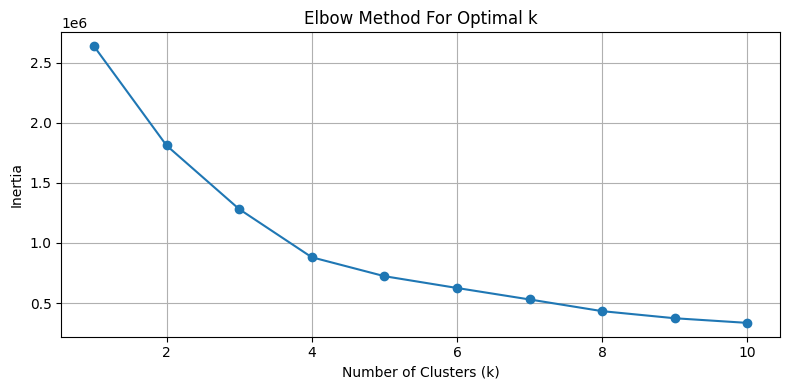

In [124]:
# Find the optimal k using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [125]:
# Replace this with your chosen k after seeing the elbow curve
optimal_k = 4  # example only — YOU should decide this

# Fit KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
RFM_Table['KMeansCluster'] = kmeans.fit_predict(rfm_scaled)


c:\Users\pascal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [126]:
# View the updated table (sample only)
print(RFM_Table[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'KMeansCluster']].head())

# Optional: save to CSV
# RFM_Table.to_csv("RFM_with_KMeans.csv", index=False)


  CustomerID  Recency  Frequency  Monetary  KMeansCluster
0   C1010011       25          2    5106.0              1
1   C1010012       68          1    1499.0              0
2   C1010014       75          2    1455.0              1
3   C1010018       36          1      30.0              3
4   C1010024       64          1    5000.0              0


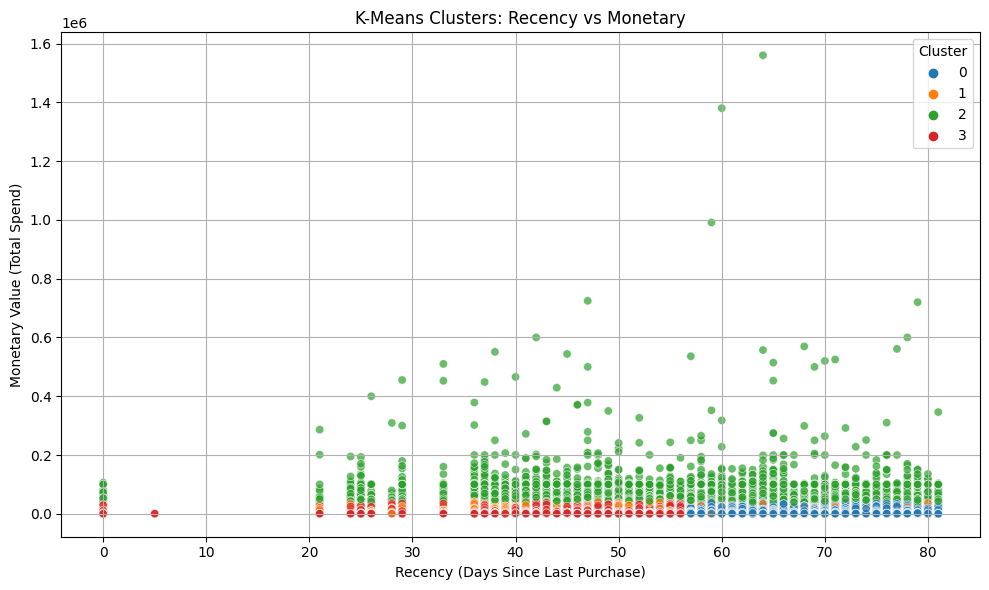

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=RFM_Table,
    x='Recency', y='Monetary',
    hue='KMeansCluster',
    palette='tab10',
    alpha=0.7
)
plt.title('K-Means Clusters: Recency vs Monetary')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Monetary Value (Total Spend)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

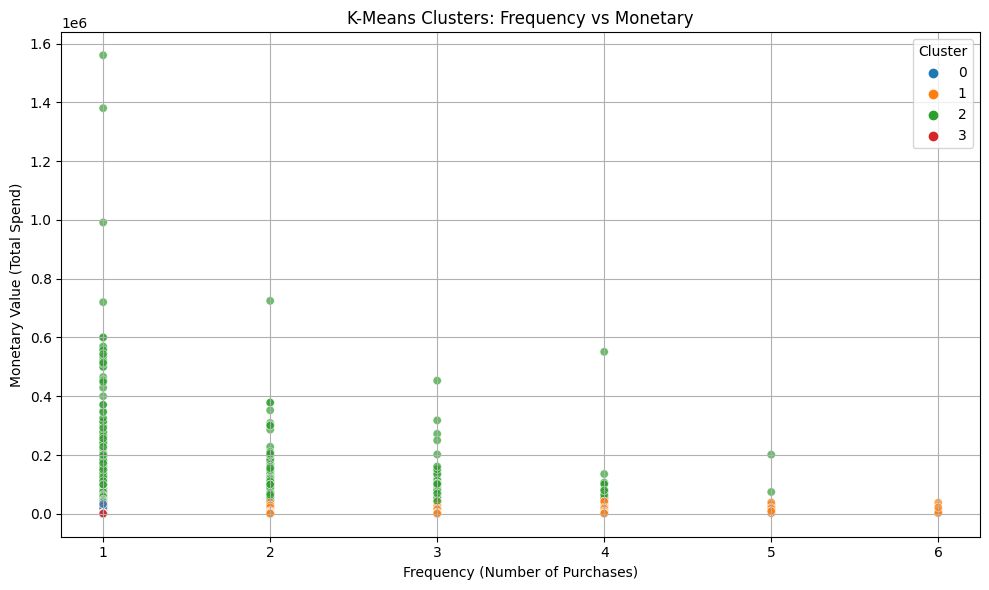

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=RFM_Table,
    x='Frequency', y='Monetary',
    hue='KMeansCluster',
    palette='tab10',
    alpha=0.7
)
plt.title('K-Means Clusters: Frequency vs Monetary')
plt.xlabel('Frequency (Number of Purchases)')
plt.ylabel('Monetary Value (Total Spend)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


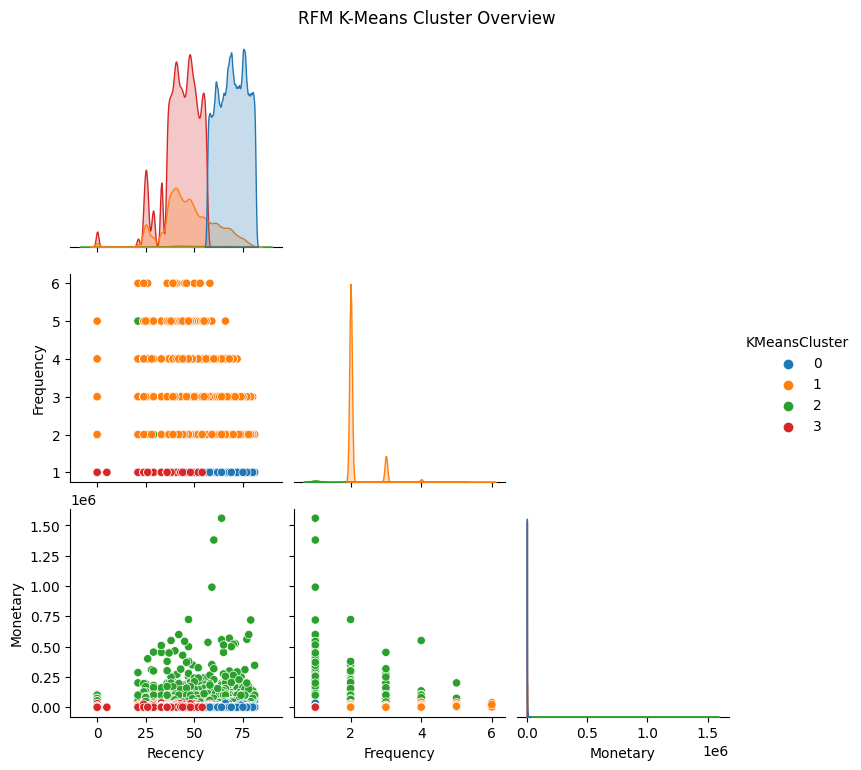

In [129]:
sns.pairplot(
    RFM_Table[['Recency', 'Frequency', 'Monetary', 'KMeansCluster']],
    hue='KMeansCluster',
    palette='tab10',
    corner=True,
    diag_kind='kde'
)
plt.suptitle('RFM K-Means Cluster Overview', y=1.02)
plt.show()
